entropy_ans_phi3
0      2410
a      1219
d      1106
b      1103
f      1079
h       925
c       878
e       839
g       670
i       665
j       578
To      532
The       4
1         4
$         3
C         2
(a        1
T         1
Q         1
Po        1
V         1
[         1
Kim       1
E         1
AB        1
A         1
540       1
293       1
240       1
(i        1
RS        1
Name: count, dtype: int64
entropy_ans_phi3
a    1219
d    1106
b    1103
f    1079
h     925
c     878
e     839
g     670
i     665
j     578
Name: count, dtype: int64


,category,roc_auc,accuracy,gini,num_samples,model,metric
0,ALL,0.724398,0.431620,0.448797,8482,Phi4-mini with fallback if unknown,entropy_value_phi3
1,law,0.618635,0.291242,0.237270,982,Phi4-mini with fallback if unknown,entropy_value_phi3
2,business,0.662879,0.326855,0.325757,566,Phi4-mini with fallback if unknown,entropy_value_phi3
3,psychology,0.827853,0.584118,0.655705,743,Phi4-mini with fallback if unknown,entropy_value_phi3
4,chemistry,0.644646,0.386256,0.289291,422,Phi4-mini with fallback if unknown,entropy_value_phi3
5,biology,0.827912,0.702362,0.655824,635,Phi4-mini with fallback if unknown,entropy_value_phi3
6,history,0.626375,0.405405,0.252750,333,Phi4-mini with fallback if unknown,entropy_value_phi3
7,other,0.728267,0.396705,0.456533,789,Phi4-mini with fallback if unknown,entropy_value_phi3
8,physics,0.660775,0.395431,0.321550,569,Phi4-mini with fallback if unknown,entropy_value_phi3
9,computer science,0.762865,0.457831,0.525731,332,Phi4-mini with fallback if unknown,entropy_value_phi3


,category,roc_auc,accuracy,gini,num_samples,model,metric
0,ALL,0.518752,0.43162,0.037504,8482,Phi4-mini with fallback if unknown,masj_edu_level_norm


,category,roc_auc,accuracy,gini,num_samples,model,metric
0,ALL,0.543396,0.43162,0.086791,8482,Phi4-mini with fallback if unknown,masj_num_reasoning_steps_norm


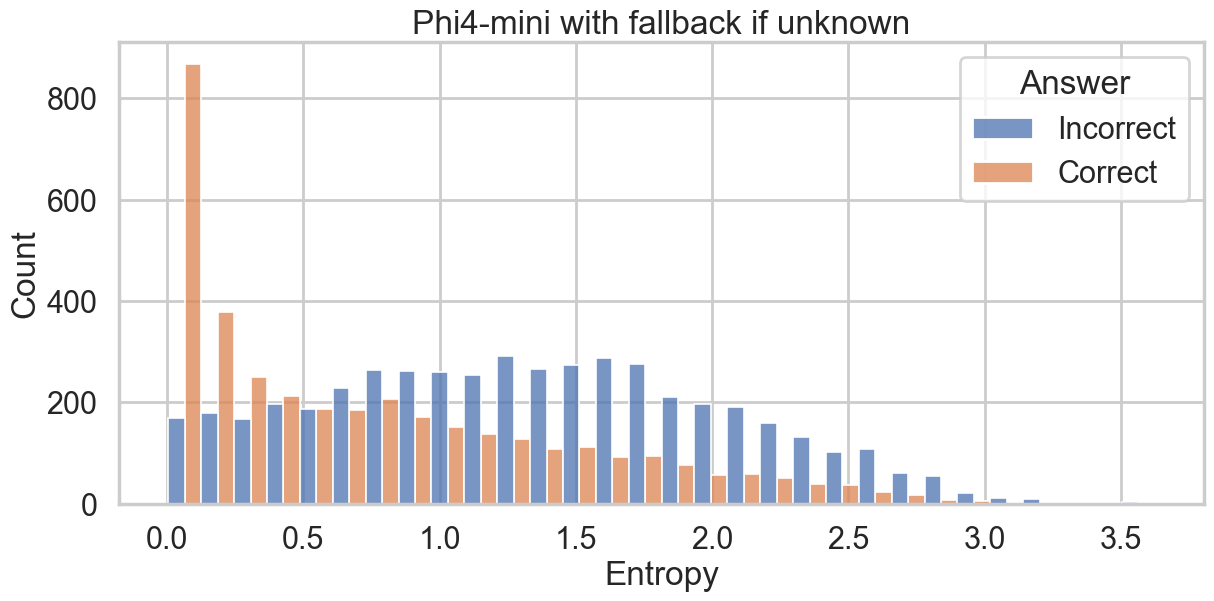

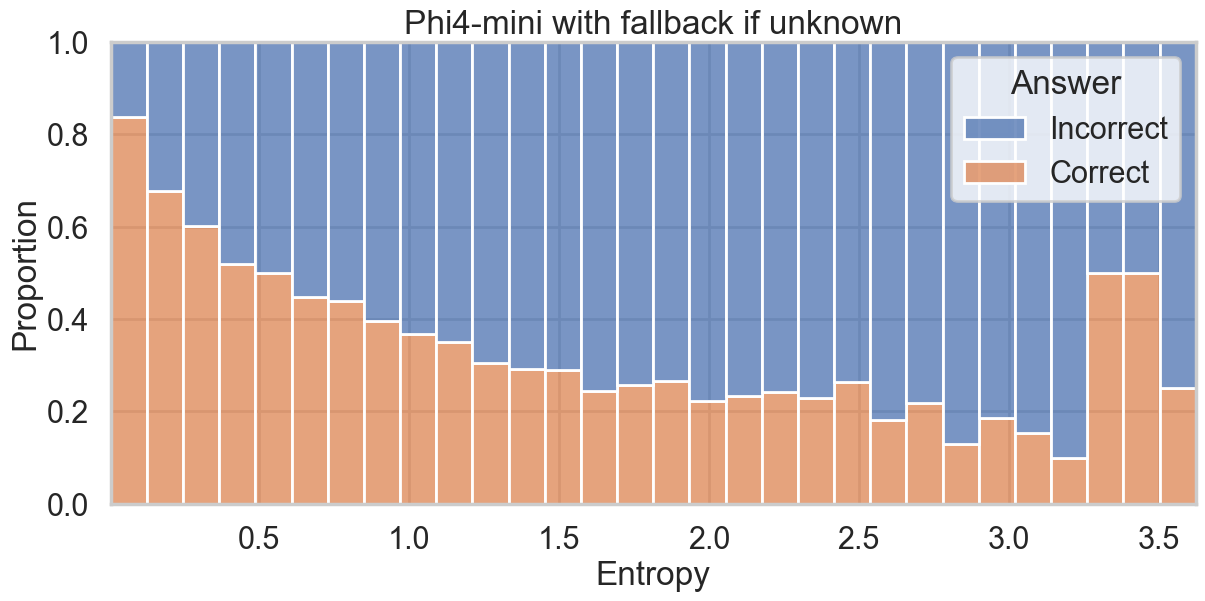

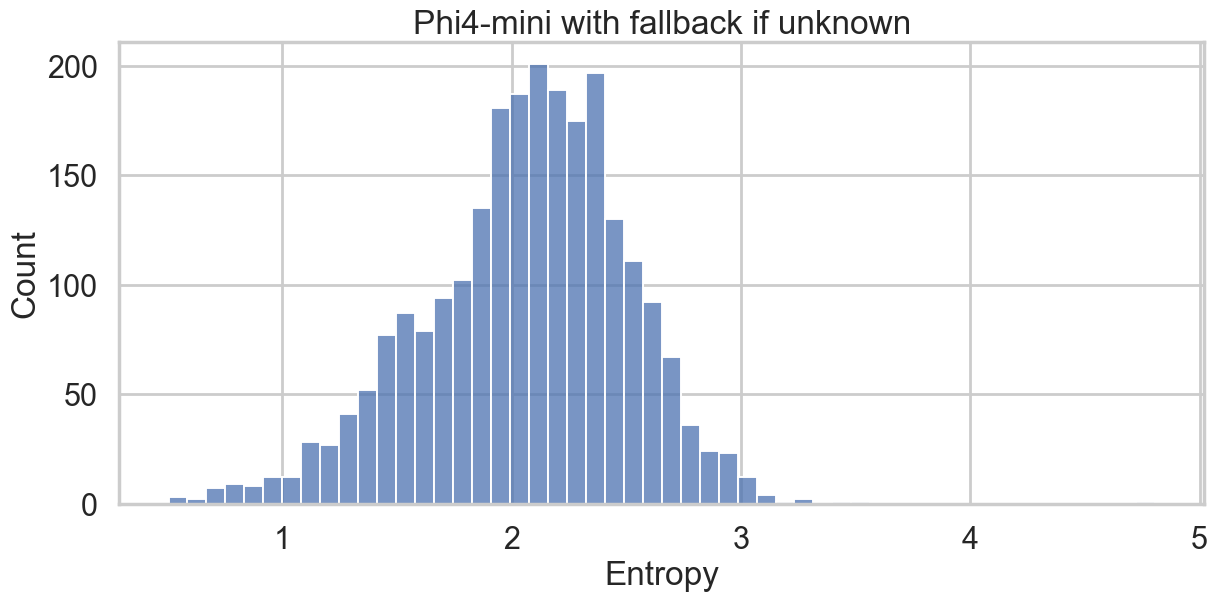

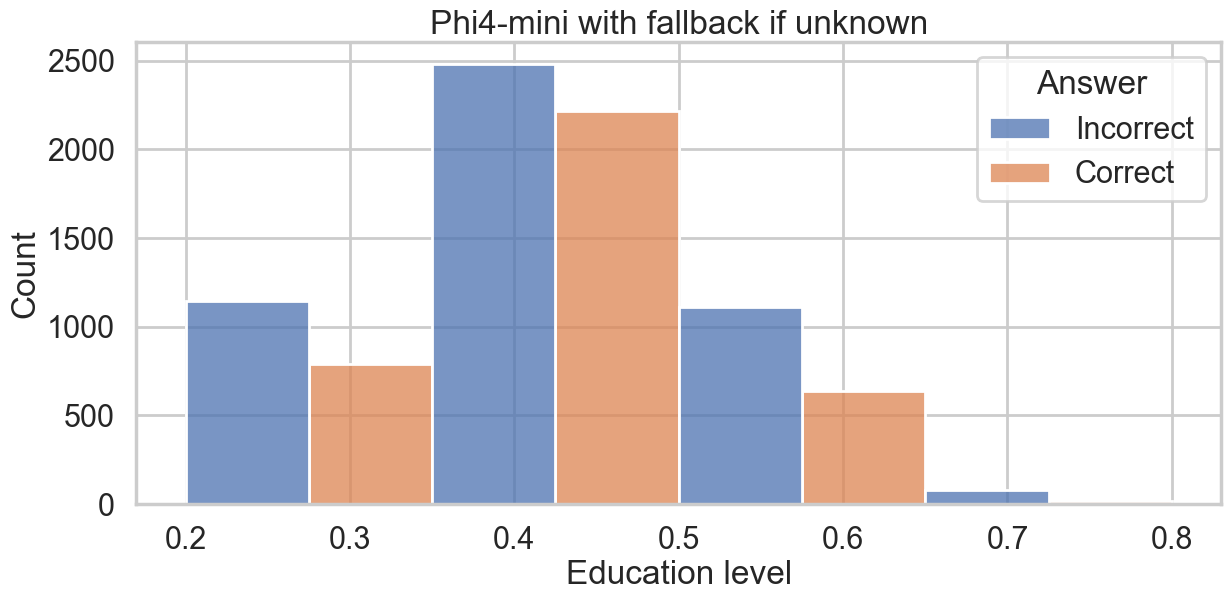

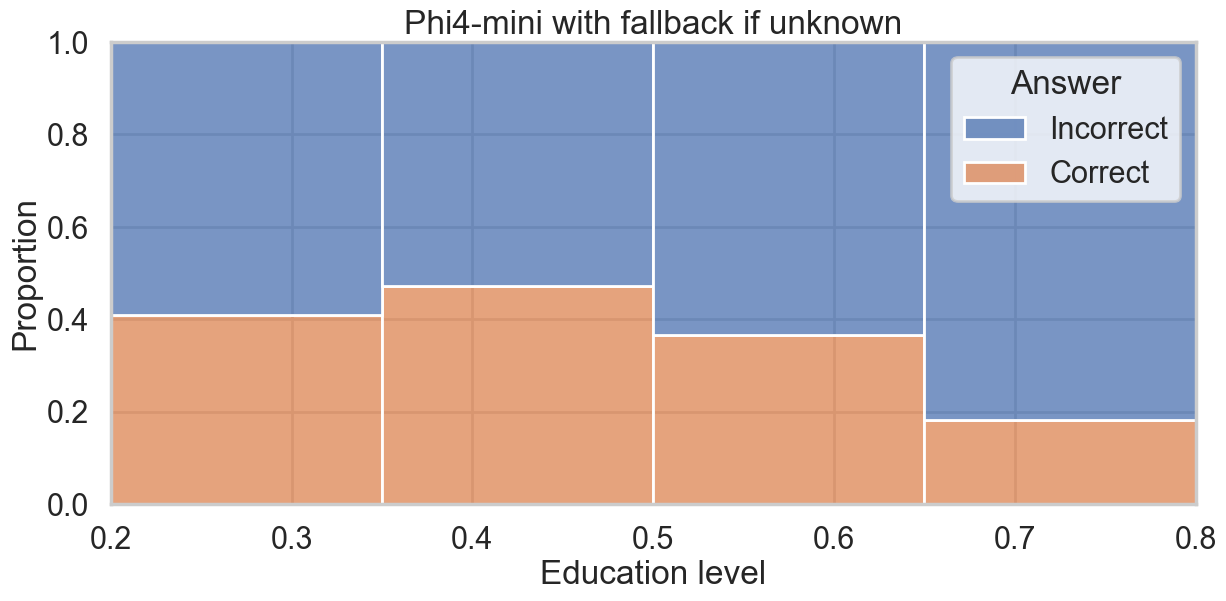

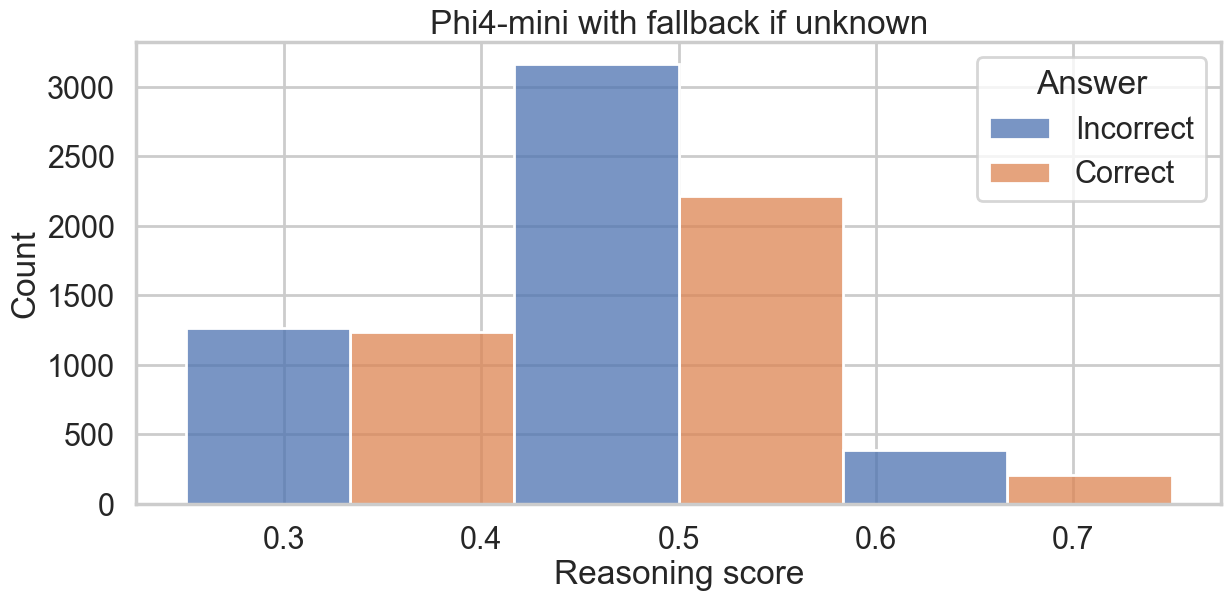

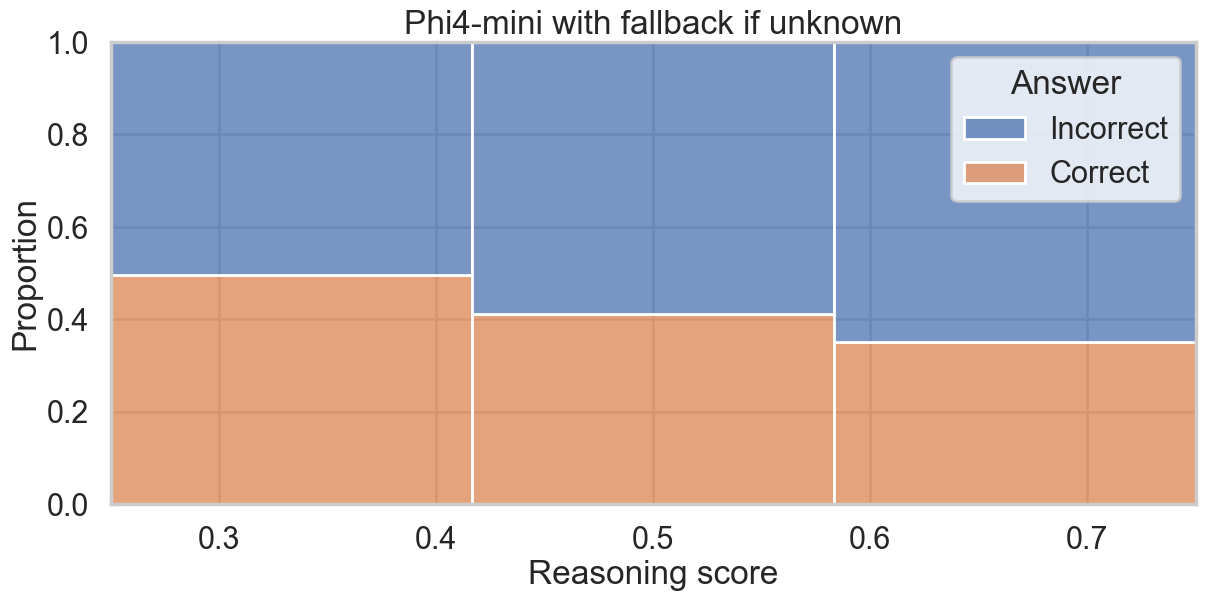

In [1]:
import seaborn as sns

from reasoning_fine_tune.analysis.standard_analysis import standard_analysis_single_token_response

sns.set_theme(palette="deep")

standard_analysis_single_token_response(
    "../../../data/out/single_token_entropy/mmlu_phi4mini_w_fallback_if_unknown.tsv",
    "entropy_ans_phi3",
    "entropy_ans_correct_phi3",
    "entropy_value_phi3",
    "Phi4-mini with fallback if unknown",
)